## 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # 얘는 시각화였나 

In [2]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')  # 63p
df.head()

# 같은 숫자 family = 같은 가족 구성원 (n이 4개 = 자녀 4명) 

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌

In [3]:
# Filtering : 조건을 만족시키는 것만 True, or False 
df = df[df.Gender=='M']
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [4]:
# Selection : 내가 필요로 하는 항의 컬럼만 리스트로 작성하여 데이터 가져오기
df = df[['Father', 'Height']]
df.head()

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [5]:
# df = df[df.Gender == 'M'][['Father', 'Height']]
# df.head(3)

In [6]:
# 'Height' 칼럼을 'Son'으로 변경 
df.rename(columns={'Height' : 'Son'}, inplace=True)
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [7]:
# 'inch'를 ''cm'로 
df = df * 2.54 
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


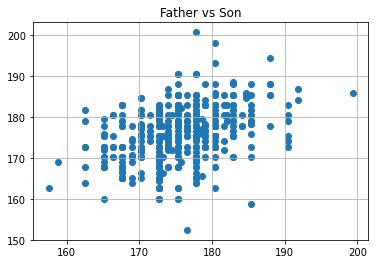

In [8]:
# 산점도 그리기 
plt.scatter(df.Father, df.Son)      # x, y 독립, 종속 순 
plt.grid()
plt.title('Father vs Son')
plt.show()

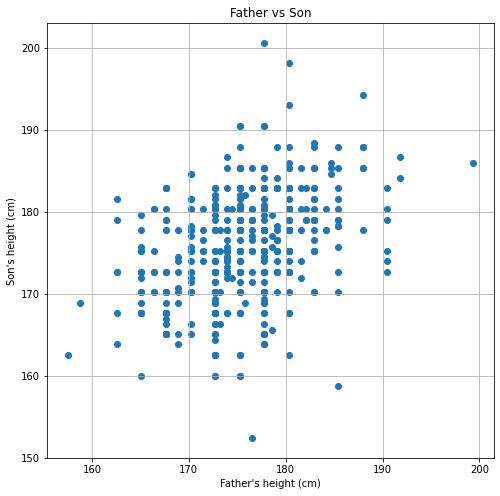

In [9]:
# pretty 
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

- 회귀선 구하기 : Numpy polyfit

In [10]:
fp1 = np.polyfit(df.Father, df.Son, 1)      # (x, y, 회귀식 차원) (단순선형 1차식으로 아버지 아들 키 관계) 
fp1
# (기울기, 절편)

array([ 0.44774792, 97.17763701])

In [11]:
x = np.array([156, 201])
y = fp1[0]*x + fp1[1]
y

array([167.02631215, 187.17496845])

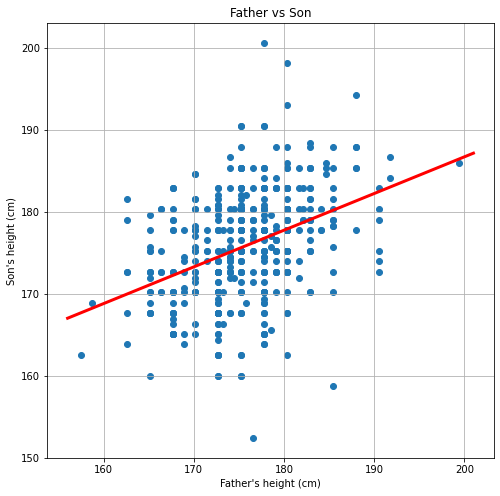

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.plot([156,201], [156*fp1[0]+fp1[1], 201*fp1[0]+fp1[1]], 'r-', lw=3)     # 선 그리기 x,y 값 지정 
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

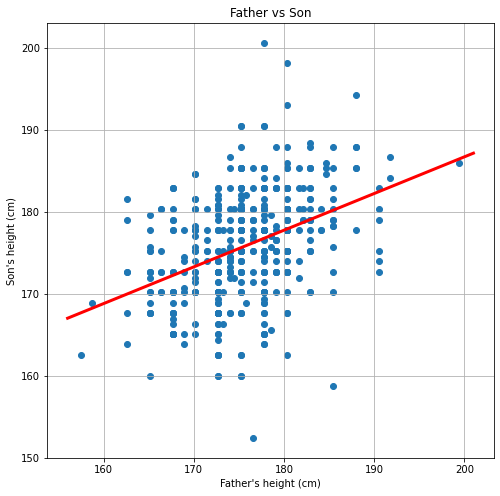

In [13]:
# 얘도 가능(이미 x,y 정의했으니까)
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.plot(x, y, 'r-', lw=3)     # 선 그리기 x,y 값 지정 
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

- 회귀선의 기울기와 절편 구하기 : Scikit- Learn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# X의 shape 보기 ( 암묵적으로 2차원이라 간주했는데 1차원 나옴)
df.Father.values.shape

(465,)

In [16]:
# X의 shpape 1차원 --> 2차원 (이상)으로 바꿔주어야 함 

In [17]:
lr = LinearRegression()
lr.fit(df.Father.values, df.Son.values)

ValueError: Expected 2D array, got 1D array instead:
array=[199.39  191.77  191.77  190.5   190.5   190.5   190.5   190.5   190.5
 187.96  187.96  187.96  187.96  187.96  187.96  185.42  185.42  185.42
 185.42  185.42  185.42  185.42  185.42  185.42  185.42  185.42  185.42
 185.42  184.658 184.658 184.658 182.88  182.88  182.88  182.88  182.88
 182.88  182.88  182.88  182.88  182.88  182.88  182.88  182.88  184.15
 184.15  184.15  182.88  182.88  182.88  182.88  182.88  182.88  182.88
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  182.118 180.34
 180.34  180.34  180.34  181.61  181.61  181.61  180.34  180.34  182.118
 182.118 182.118 180.34  180.34  180.34  181.61  181.61  181.61  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   179.07  179.07  179.07
 179.07  177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   179.07  179.07  179.07  179.07  179.07
 179.07  177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   179.07  179.07  179.07  177.8   177.8   177.8   177.8
 177.8   177.8   179.07  179.07  179.07  179.07  179.07  178.562 178.562
 178.562 178.562 179.07  179.07  177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   175.26  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  176.53
 176.53  175.26  176.53  176.53  176.53  176.53  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  176.53  176.53  176.53  175.768 175.768
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 175.26  176.53  176.53  176.53  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  176.53  176.53  176.53  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 174.498 173.99  173.99  173.99  173.99  173.99  173.99  173.99  173.99
 173.99  173.99  173.99  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  173.99  173.99  173.99  173.99  172.72  172.72
 172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  172.72  172.72  172.72  172.72  173.99  173.99
 173.99  172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  173.99  172.72  173.228 173.228 173.228 173.228
 172.72  174.498 172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  173.99  172.72  172.72  172.72  172.72  172.72  172.72
 170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18
 170.18  170.18  171.45  171.45  170.18  170.18  170.18  170.18  170.18
 170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18  171.45
 171.45  171.45  171.45  170.18  167.64  167.64  167.64  167.64  167.64
 167.64  167.64  167.64  167.64  167.64  167.64  167.64  168.91  168.91
 168.91  168.91  167.64  167.64  167.64  167.64  168.91  168.91  168.91
 168.91  168.91  167.64  167.64  167.64  167.64  167.64  167.64  167.64
 167.64  167.64  167.64  167.64  167.64  165.1   165.1   165.1   165.1
 165.1   165.1   165.1   165.1   165.1   165.1   165.1   165.1   165.1
 165.1   165.1   165.1   165.1   166.37  166.37  166.37  166.37  166.37
 166.37  166.37  162.56  162.56  162.56  162.56  162.56  162.56  157.48
 158.75  173.99  173.99  173.99  173.99  173.99 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
lr = LinearRegression()
lr.fit(df.Father.values.reshape(-1,1), df.Son.values)

LinearRegression()

In [19]:
# 기울기 
lr.coef_

array([0.44774792])

In [20]:
# 절편 
lr.intercept_       # polyfit 으로 구한 것과 똑같음 확인 

97.17763700739346

In [21]:
# 잔차 제곱의 합  (RSS : Residual Sum of Square)
lr._residues

17556.59951549399

In [22]:
# R squared - 성능 평가 요소
lr.score(df.Father.values.reshape(-1,1), df.Son.values) 

0.15312927478306992

In [23]:
from sklearn.metrics import r2_score # R_squared와 같은 성능평가
